In [643]:
import pandas as pd
import yfinance as yf 
# Print graphs inline instead of a separate window
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
%matplotlib inline
# Set pandas display precision to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
# Load the custom style
plt.style.use('./phill_styles.mplstyle')

In [644]:
def remove_spines(ax=None, spines=('top', 'right', 'left')):
    """
    Remove specified spines from a matplotlib axis.
    
    Parameters:
    - ax: matplotlib.axes.Axes (optional)
        The axis from which to remove the spines. Defaults to the current axis.
    - spines: tuple of str (optional)
        The spines to remove. Options are 'top', 'right', 'bottom', 'left'.
    """
    if ax is None:
        ax = plt.gca()  # Get the current axis if none is provided
    
    for spine in spines:
        if spine in ax.spines:
            ax.spines[spine].set_visible(False)


In [645]:
# Define a formatter for dollar units
def dollar_formatter(x, _):
    return f"${x:,.0f}"  # Format with commas and no decimals

In [646]:
def plot_single_axis(df, primary_col, recession_col, title):
    """
    Plot a single-axis line chart with recession periods shaded.
    
    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the df to plot.
    - primary_col: str
        The column to plot on the y-axis (e.g., 'SP500').
    - recession_col: str
        The column indicating recession periods (binary values: 1 for recession, 0 otherwise).
    - title: str (optional)
        The title of the plot.
    """
    plt.figure(figsize=(12, 6))

    # Plot the primary df
    plt.plot(df.index, df[primary_col], label=primary_col, color='blue')

    # Highlight recession periods
    plt.fill_between(df.index, df[primary_col].min(), df[primary_col].max(),
                     where=df[recession_col] == 1, color='gray', alpha=0.3, label='Recession')

    # Add labels and title
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)

    # Remove artificial padding
    plt.xlim(df.index.min())
    plt.ylim(df[primary_col].min())

    # Remove top and right spines
    ax = plt.gca()  # Get the current axis
    remove_spines(ax)

    # Add legend and display the plot
    plt.legend()
    plt.tight_layout()
    plt.show()


In [647]:
def plot_dual_axis(df, primary_col, title):
    """
    Plot a DataFrame with a dual y-axis.
    
    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data to plot.
    - primary_col: str
        The column to use for the primary y-axis.
    - title: str (optional)
        The title of the plot.
    """
    # Create the figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 6))
    linewidth = 0.75

    # Plot the primary column on the primary y-axis
    ax1.plot(df.index, df[primary_col], label=primary_col, color='lightgray')
    ax1.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))  # Add $ to primary axis
    ax1.tick_params(axis='y', labelcolor='gray')  # Match tick label color to gray for primary y-axis
    ax1.set_ylabel(f'{primary_col} Price (USD)', fontsize=12, color='gray')

    # Create a secondary y-axis for the other columns
    ax2 = ax1.twinx()
    
    # Plot secondary columns with shades
    for col in df.columns:
        if col != primary_col:  # Exclude the primary column
            # Assign specific colors for the two additional plots
            color = 'blue' if col == df.columns[-2] else 'turquoise'
            ax2.plot(df.index, df[col], label=col, color=color, linewidth=linewidth)

    ax2.tick_params(axis='y', labelcolor='blue')  # Match tick label color to the lines
    ax2.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))  # Add $ to secondary axis
    ax2.set_ylabel('Other Prices (USD)', fontsize=12, color='blue')

    # Remove top and right spines
    remove_spines(ax1)
    remove_spines(ax2)

    # Add titles and legends
    plt.title(title, fontsize=16)
    fig.tight_layout()

    # Combine legends for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Show the plot
    plt.show()

In [648]:
tickers_consumer_discretionary = ['XLY', 'VCR']
tickers_consumer_staples = ['XLP', 'VDC']
start_date = "2014-01-01"
end_date = pd.Timestamp("today")

# Download historical market data for a specified ticker symbol from Yahoo Finance
df_consumer_discretionary = yf.download(tickers_consumer_discretionary, start=start_date, end=end_date)
df_consumer_staples = yf.download(tickers_consumer_staples, start=start_date, end=end_date)

/Users/phillipkim/miniconda3/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/phillipkim/miniconda3/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed
/Users/phillipkim/miniconda3/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                

In [649]:
df_consumer_discretionary.head()

Price      Adj Close        Close         High          Low         Open  \
Ticker           VCR   XLY    VCR   XLY    VCR   XLY    VCR   XLY    VCR   
Date                                                                       
2014-01-02     95.21 58.68 107.54 66.52 108.07 66.83 107.25 66.28 108.05   
2014-01-03     95.07 58.52 107.38 66.34 107.93 66.73 107.29 66.31 107.65   
2014-01-06     94.46 58.16 106.70 65.93 107.73 66.57 106.50 65.78 107.71   
2014-01-07     95.01 58.52 107.32 66.33 107.59 66.52 106.95 66.00 107.29   
2014-01-08     94.91 58.36 107.20 66.15 107.38 66.37 106.77 65.97 107.31   

Price             Volume           
Ticker       XLY     VCR      XLY  
Date                               
2014-01-02 66.70  374600  4331900  
2014-01-03 66.56  647200  3772800  
2014-01-06 66.42  264000  4078800  
2014-01-07 66.52  252600  3085700  
2014-01-08 66.29  175000  5789500

In [650]:
df_consumer_staples.head()

Price      Adj Close        Close         High          Low         Open  \
Ticker           VDC   XLP    VDC   XLP    VDC   XLP    VDC   XLP    VDC   
Date                                                                       
2014-01-02     83.38 31.96 108.89 42.45 109.87 42.87 108.64 42.38 109.87   
2014-01-03     83.27 31.90 108.75 42.37 109.19 42.61 108.55 42.34 108.96   
2014-01-06     82.91 31.78 108.27 42.21 109.05 42.53 108.08 42.11 109.01   
2014-01-07     83.39 31.95 108.90 42.44 109.11 42.54 108.58 42.24 108.63   
2014-01-08     82.85 31.71 108.20 42.12 108.92 42.43 107.91 42.03 108.92   

Price             Volume            
Ticker       XLP     VDC       XLP  
Date                                
2014-01-02 42.85  134500  14997000  
2014-01-03 42.54  111600   6298600  
2014-01-06 42.48   92000   9498600  
2014-01-07 42.43   84900   7479100  
2014-01-08 42.43   99200  23824100

In [651]:
df_consumer_discretionary.columns

MultiIndex([('Adj Close', 'VCR'),
            ('Adj Close', 'XLY'),
            (    'Close', 'VCR'),
            (    'Close', 'XLY'),
            (     'High', 'VCR'),
            (     'High', 'XLY'),
            (      'Low', 'VCR'),
            (      'Low', 'XLY'),
            (     'Open', 'VCR'),
            (     'Open', 'XLY'),
            (   'Volume', 'VCR'),
            (   'Volume', 'XLY')],
           names=['Price', 'Ticker'])

In [652]:
import pandas_datareader
print(pandas_datareader.__version__)

0.10.0


In [653]:
from pandas_datareader import data as pdr

# Fetch recession indicators (USREC)
recession_data = pdr.DataReader('USREC', 'fred', start='1950-01-01')

# Fetch S&P 500 data
sp500 = yf.download('^GSPC', start='1950-01-01')['Adj Close']

/Users/phillipkim/miniconda3/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [654]:
# Combine the data
sp500_with_recessions = pd.DataFrame({'SP500': sp500}).join(recession_data, how='inner')

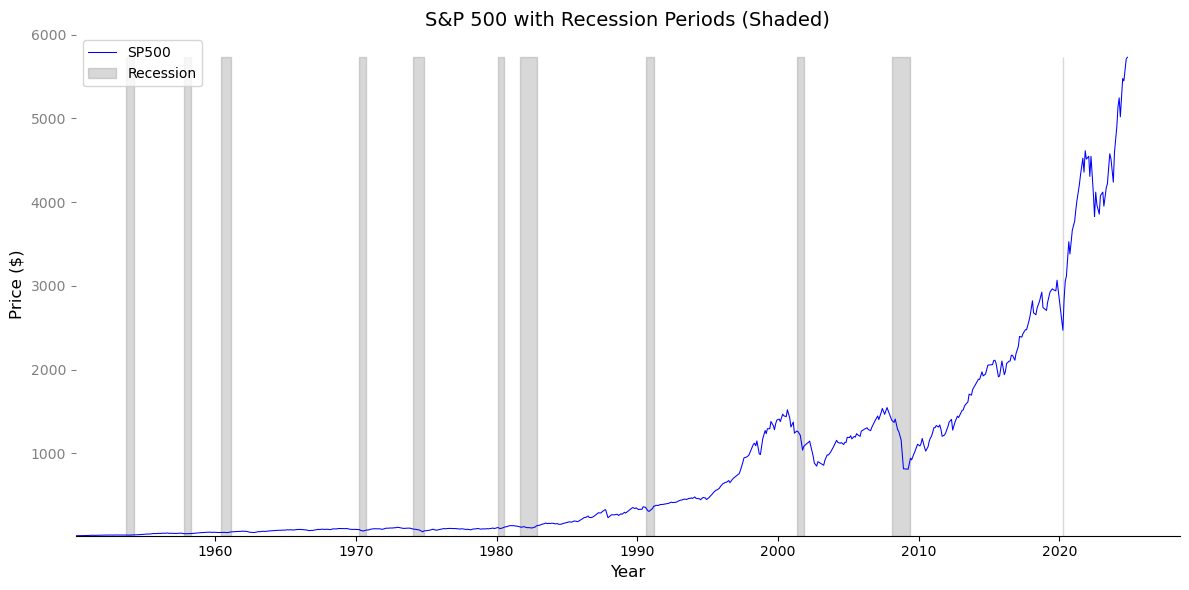

In [656]:
plot_single_axis(sp500_with_recessions, primary_col='SP500', recession_col='USREC', title='S&P 500 with Recession Periods (Shaded)')

In [657]:
# Combine DataFrames
df_combined = (
    pd.DataFrame({'SP500': sp500})
    .join(df_consumer_discretionary[('Adj Close')], how='inner')
    .join(df_consumer_staples[('Adj Close')], how='inner')
)
df_combined.info(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2749 entries, 2014-01-02 to 2024-12-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2749 non-null   float64
 1   VCR     2749 non-null   float64
 2   XLY     2749 non-null   float64
 3   VDC     2749 non-null   float64
 4   XLP     2749 non-null   float64
dtypes: float64(5)
memory usage: 128.9 KB


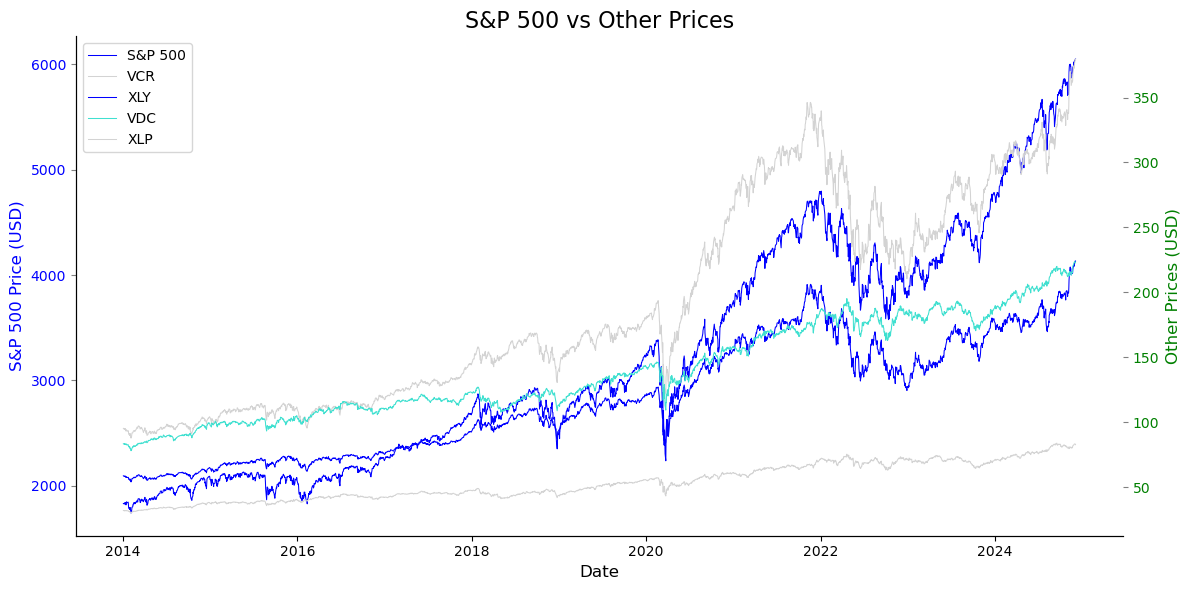

In [658]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SP500 on the primary y-axis
ax1.plot(df_combined.index, df_combined['SP500'], label='S&P 500', color='blue')
ax1.set_ylabel('S&P 500 Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')  # Match tick label color to the line
ax1.set_xlabel('Date', fontsize=12)

# Create a secondary y-axis for the rest of the data
ax2 = ax1.twinx()
for col in df_combined.columns:
    if col != 'SP500':  # Exclude SP500 column
        ax2.plot(df_combined.index, df_combined[col], label=col)

ax2.set_ylabel('Other Prices (USD)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')  # Match tick label color to the lines

# Add titles and legends
plt.title('S&P 500 vs Other Prices', fontsize=16)
fig.tight_layout()

# Combine legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show the plot
plt.show()

Dropping SPDR ETFs 

In [659]:
df_VCR = df_consumer_discretionary[('Adj Close', 'VCR')]
df_VDC = df_consumer_staples[('Adj Close', 'VDC')]

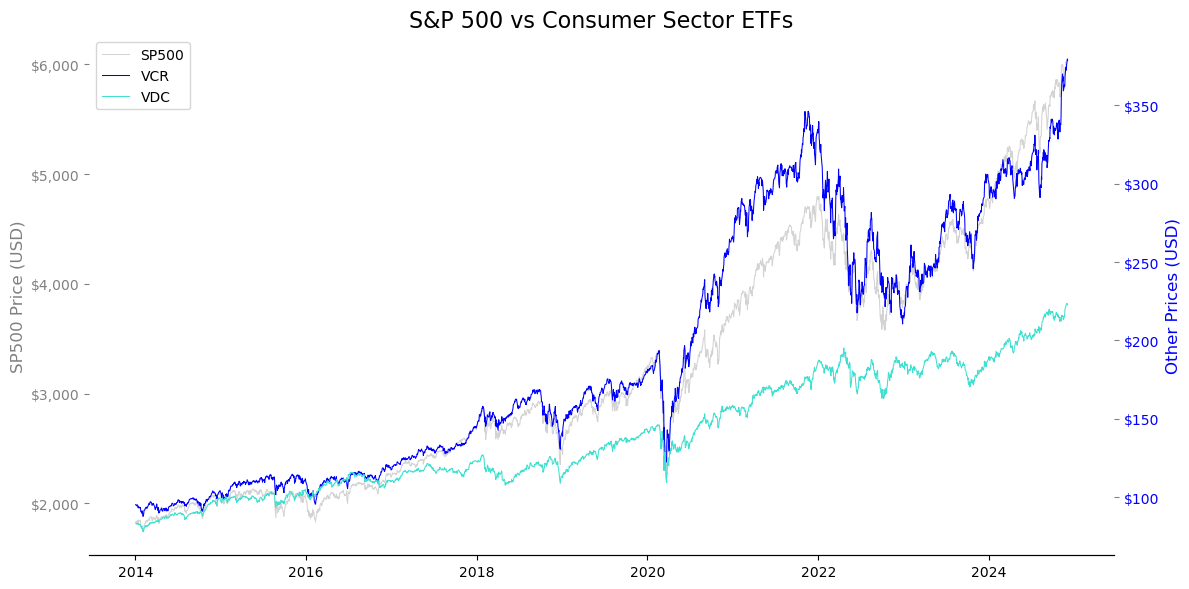

In [660]:
# Align indices and combine to create new DataFrame
df_combined = pd.concat([sp500, df_VCR, df_VDC], axis=1, join='inner')

# Rename columns for clarity
df_combined.columns = ['SP500', 'VCR', 'VDC']

plot_dual_axis(df_combined, primary_col='SP500', title='S&P 500 vs Consumer Sector ETFs')

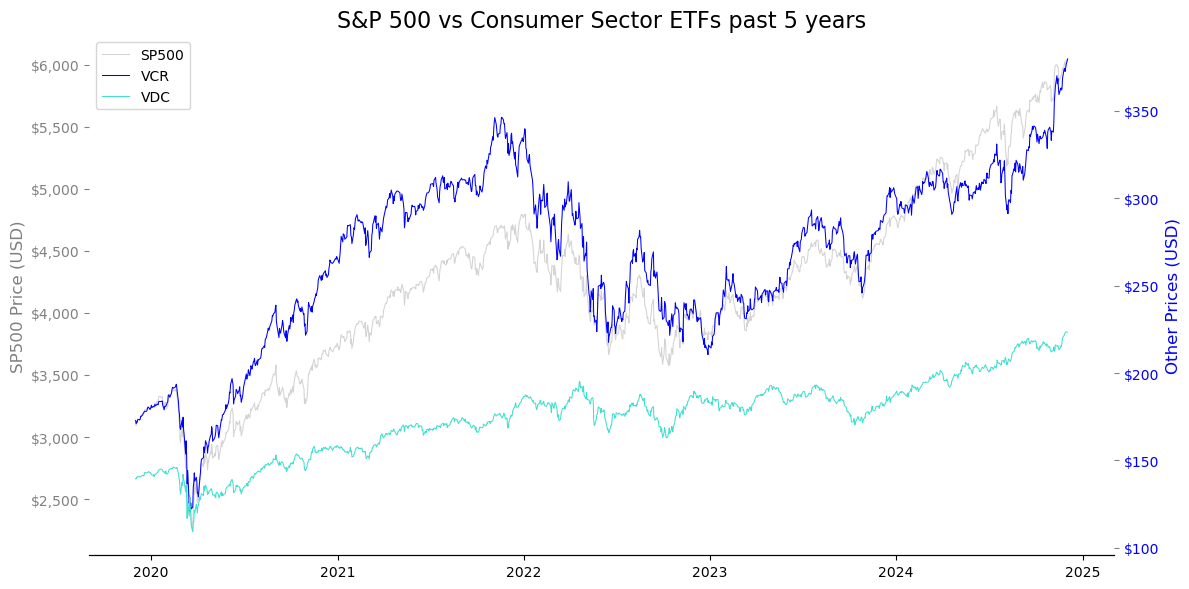

In [661]:
time_horizon = 252*5
df = df_combined[-time_horizon:-1]

plot_dual_axis(df, primary_col='SP500', title='S&P 500 vs Consumer Sector ETFs past 5 years')